<a href="https://www.kaggle.com/code/mohammedsalf/data-analysis-eda-on-ds-job-salaries?scriptVersionId=124604213" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Analysis project

In this project i will walk step by step and feature by feature, to deepdive in data and to get a lot of insights

# 1- Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-job-salaries/ds_salaries.csv


# 2- Data load

In [2]:
data = pd.read_csv("/kaggle/input/data-science-job-salaries/ds_salaries.csv")

# 3- Read data

In [3]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [5]:
data.shape

(607, 12)

In [6]:
print(data.columns.value_counts())
print()
print("The sum of data columns is:", data.columns.value_counts().sum())

Unnamed: 0            1
work_year             1
experience_level      1
employment_type       1
job_title             1
salary                1
salary_currency       1
salary_in_usd         1
employee_residence    1
remote_ratio          1
company_location      1
company_size          1
dtype: int64

The sum of data columns is: 12


In [7]:
data.describe(include="all")

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


NaN indicat's to that there are objects value(Categorical)

In [8]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


Look there're apperent an outliers in two features[["salary", "salary_in_usd"]], beacuse you can see high gab between min, max and mean

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [10]:
data.dtypes.value_counts()

object    7
int64     5
dtype: int64

In [11]:
# Here i check for duplicated values
assert data.duplicated().sum() == 0

# let's me check a missing values
assert all(data.isnull().sum() == 0)

# let's me check columns, is it objects?, is it unique?
assert data.columns.is_object() == 1
assert data.columns.is_unique == 1

NO output!!, that's mean no duplication, no missing values, and the columns are objects and unique

# Let's me write some of code to deepdive in object features information

In [12]:
print(data.select_dtypes("object").columns.value_counts())
print()
print("Sum of the objects columns is:", data.select_dtypes("object").columns.value_counts().sum())

experience_level      1
employment_type       1
job_title             1
salary_currency       1
employee_residence    1
company_location      1
company_size          1
dtype: int64

Sum of the objects columns is: 7


In [13]:
# Experience level

print("Unique values of experience level are: ", data.experience_level.unique())
print(".")

print("Number of unique values is:", data.experience_level.nunique())
print(".")

print("Maximum values are with:", data.experience_level.values.max())
print(".")

print("Minimum values are with:", data.experience_level.values.min())
print(".")

print("Most number of experience level is", data.experience_level.value_counts().idxmax(), "& it's sum:", data.experience_level.value_counts().max())
print(".")

print("Less number of experience level is", data.experience_level.value_counts().idxmin(), "& it's sum:", data.experience_level.value_counts().min())

Unique values of experience level are:  ['MI' 'SE' 'EN' 'EX']
.
Number of unique values is: 4
.
Maximum values are with: SE
.
Minimum values are with: EN
.
Most number of experience level is SE & it's sum: 280
.
Less number of experience level is EX & it's sum: 26


In [14]:
# Employment type

print("Unique values of employment type are: ", data.employment_type.unique())
print(".")

print("Number of unique values is:", data.employment_type.nunique())
print(".")

print("Maximum values are with:", data.employment_type.values.max())
print(".")

print("Minimum values are with:", data.employment_type.values.min())
print(".")

print("Most number of employment type is", data.employment_type.value_counts().idxmax(), "& it's sum:", data.employment_type.value_counts().max())
print(".")

print("Less number of employment type is", data.employment_type.value_counts().idxmin(), "& it's sum:", data.employment_type.value_counts().min())

Unique values of employment type are:  ['FT' 'CT' 'PT' 'FL']
.
Number of unique values is: 4
.
Maximum values are with: PT
.
Minimum values are with: CT
.
Most number of employment type is FT & it's sum: 588
.
Less number of employment type is FL & it's sum: 4


In [15]:
# Company size

print("Unique values of company size are: ", data.company_size.unique())
print(".")

print("Number of unique values is:", data.company_size.nunique())
print(".")

print("Maximum values are with:", data.company_size.values.max())
print(".")

print("Minimum values are with:", data.company_size.values.min())
print(".")

print("Most number of company size is", data.company_size.value_counts().idxmax(), "& it's sum:", data.company_size.value_counts().max())
print(".")

print("Less number of company size is", data.company_size.value_counts().idxmin(), "& it's sum:", data.company_size.value_counts().min())

Unique values of company size are:  ['L' 'S' 'M']
.
Number of unique values is: 3
.
Maximum values are with: S
.
Minimum values are with: L
.
Most number of company size is M & it's sum: 326
.
Less number of company size is S & it's sum: 83


# High Cardinality features

High cardinality means there are too many of unique values

In [16]:
# Job title

print("Unique values of jop title are: ", data.job_title.unique())
print(".")

print("Number of unique values is:", data.job_title.nunique())
print(".")

print("Maximum values are with:", data.job_title.values.max())
print(".")

print("Minimum values are with:", data.job_title.values.min())
print(".")

print("Most number of jop title is", data.job_title.value_counts().idxmax(), "& it's sum:", data.job_title.value_counts().max())
print(".")

print("Less number of jop title is", data.job_title.value_counts().idxmin(), "& it's sum:", data.job_title.value_counts().min())

Unique values of jop title are:  ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'D

Job title is a high cardinalty feature, beacuse the number of unique values is 50

In [17]:
# Salary currency

print("Unique values of salary currency are:\n ", data.salary_currency.unique())
print(".")

print("Number of unique values is:", data.salary_currency.nunique())
print(".")

print("Maximum values are with:", data.salary_currency.values.max())
print(".")

print("Minimum values are with:", data.salary_currency.values.min())
print(".")

print("Most number of salary currency is", data.salary_currency.value_counts().idxmax(), "& it's sum:", data.salary_currency.value_counts().max())
print(".")

print("Less number of salary currency is", data.job_title.value_counts().idxmin(), "& it's sum:", data.salary_currency.value_counts().min())

Unique values of salary currency are:
  ['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK' 'PLN' 'SGD'
 'CLP' 'BRL' 'TRY' 'AUD' 'CHF']
.
Number of unique values is: 17
.
Maximum values are with: USD
.
Minimum values are with: AUD
.
Most number of salary currency is USD & it's sum: 398
.
Less number of salary currency is Lead Machine Learning Engineer & it's sum: 1


Salary currency is a high cardinalty feature

In [18]:
# Employee residence

print("Unique values of employee residence are:\n ", data.employee_residence.unique())
print(".")

print("Number of unique values is:", data.employee_residence.nunique())
print(".")

print("Maximum values are with:", data.employee_residence.values.max())
print(".")

print("Minimum values are with:", data.employee_residence.values.min())
print(".")

print("Most number of employee residence is from", data.employee_residence.value_counts().idxmax(), "& it's sum:", data.employee_residence.value_counts().max())
print(".")

print("Less number of employee residence is from ", data.employee_residence.value_counts().idxmin(), "& it's sum:", data.employee_residence.value_counts().min())

Unique values of employee residence are:
  ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']
.
Number of unique values is: 57
.
Maximum values are with: VN
.
Minimum values are with: AE
.
Most number of employee residence is from US & it's sum: 332
.
Less number of employee residence is from  BO & it's sum: 1


Employee residence is a high cardinalty feature


In [19]:
# Company location

print("Unique values of company location are:\n ", data.company_location.unique())
print(".")

print("Number of unique values is:", data.company_location.nunique())
print(".")

print("Maximum values are with:", data.company_location.values.max())
print(".")

print("Minimum values are with:", data.company_location.values.min())
print(".")

print("Most number of company location is in", data.company_location.value_counts().idxmax(), "& it's sum:", data.company_location.value_counts().max())
print(".")

print("Less number of company location is in ", data.company_location.value_counts().idxmin(), "& it's sum:", data.company_location.value_counts().min())

Unique values of company location are:
  ['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'CN' 'GR' 'AE' 'NL'
 'MX' 'CA' 'AT' 'NG' 'ES' 'PT' 'DK' 'IT' 'HR' 'LU' 'PL' 'SG' 'RO' 'IQ'
 'BR' 'BE' 'UA' 'IL' 'RU' 'MT' 'CL' 'IR' 'CO' 'MD' 'KE' 'SI' 'CH' 'VN'
 'AS' 'TR' 'CZ' 'DZ' 'EE' 'MY' 'AU' 'IE']
.
Number of unique values is: 50
.
Maximum values are with: VN
.
Minimum values are with: AE
.
Most number of company location is in US & it's sum: 355
.
Less number of company location is in  VN & it's sum: 1


Company location is a high cardinility feature

In [20]:
# Numerical values

# Now let me deep dive in numerical features information

In [21]:
data.select_dtypes(int).columns.value_counts()

Unnamed: 0       1
work_year        1
salary           1
salary_in_usd    1
remote_ratio     1
dtype: int64

In [22]:
# first let me turn (Unnamed: 0) to (Unnamed)
[c.split(": 0")[0] for c in data.select_dtypes(int).columns]

# Lets me asign it to data
data.columns = [c.split(": 0")[0] for c in data.columns]

# let me check the change
data.select_dtypes(int).columns.value_counts()

# Or check
data.columns[0]

'Unnamed'

The change is done

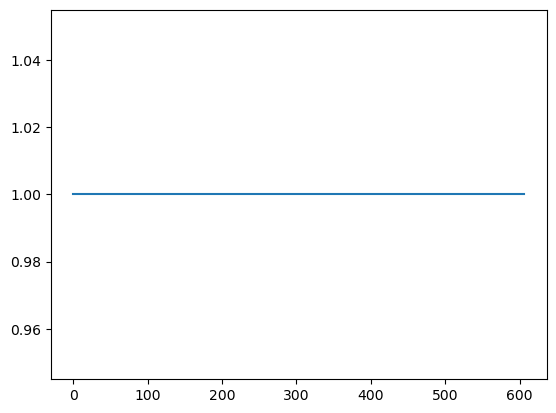

.
0      1
399    1
401    1
402    1
403    1
      ..
203    1
204    1
205    1
206    1
606    1
Name: Unnamed, Length: 607, dtype: int64


In [23]:
# Unnamed feature

data.Unnamed.value_counts().plot();
plt.show()

print(".")
print(data.Unnamed.value_counts())

This feature does not has any information, it's just repeated index, So let me drop it.

In [24]:
data.drop(columns="Unnamed", inplace=True)

In [25]:
# Work year

print("The work years are:\n ", ( data.work_year.value_counts(normalize=True) * 100).round(1))
print(".")

print("The most work year is", data.work_year.value_counts().idxmax(), "& it sum values", data.work_year.value_counts().max())
print(".")

print("The less work year is", data.work_year.value_counts().idxmin(), "& it sum values", data.work_year.value_counts().min())

The work years are:
  2022    52.4
2021    35.7
2020    11.9
Name: work_year, dtype: float64
.
The most work year is 2022 & it sum values 318
.
The less work year is 2020 & it sum values 72


In [26]:
# Salary

print("The salaries are:\n ", (data.salary.value_counts()).head())
print(".")

print("The maximum salary is ", data.salary.values.max())
print(".")

print("The lowerest salary is ", data.salary.values.min())
print(".")

print("The most salary paid is", data.salary.value_counts().idxmax())
print(".")

print("The less salary paid is", data.salary.value_counts().idxmin())

The salaries are:
  100000    18
80000     18
120000    15
60000     15
150000    14
Name: salary, dtype: int64
.
The maximum salary is  30400000
.
The lowerest salary is  4000
.
The most salary paid is 100000
.
The less salary paid is 126000


In [27]:
# Salary in usd

print("The salaries is usd are:\n ", (data.salary_in_usd.value_counts()).head())
print(".")

print("The maximum salary in usd is ", data.salary_in_usd.values.max())
print(".")

print("The lowerest salary in usd is ", data.salary_in_usd.values.min())
print(".")

print("The most salary paid in usd is", data.salary_in_usd.value_counts().idxmax())
print(".")

print("The less salary paid in usd is", data.salary_in_usd.value_counts().idxmin())

The salaries is usd are:
  100000    15
120000    12
150000    12
200000    10
135000     9
Name: salary_in_usd, dtype: int64
.
The maximum salary in usd is  600000
.
The lowerest salary in usd is  2859
.
The most salary paid in usd is 100000
.
The less salary paid in usd is 136600


In [28]:
# Remote ratio

print("The remote ratio is:\n ", (data.remote_ratio.value_counts()).head())
print(".") 

print("More remote ratio is", data.remote_ratio.value_counts().idxmax(), "& it's mean Fully remote")
print(".")

print("Less remote ratio is", data.remote_ratio.value_counts().idxmin(), "it's mean Partially remote")

The remote ratio is:
  100    381
0      127
50      99
Name: remote_ratio, dtype: int64
.
More remote ratio is 100 & it's mean Fully remote
.
Less remote ratio is 50 it's mean Partially remote


# 4- EDA (Part 1)

<Figure size 1500x500 with 0 Axes>

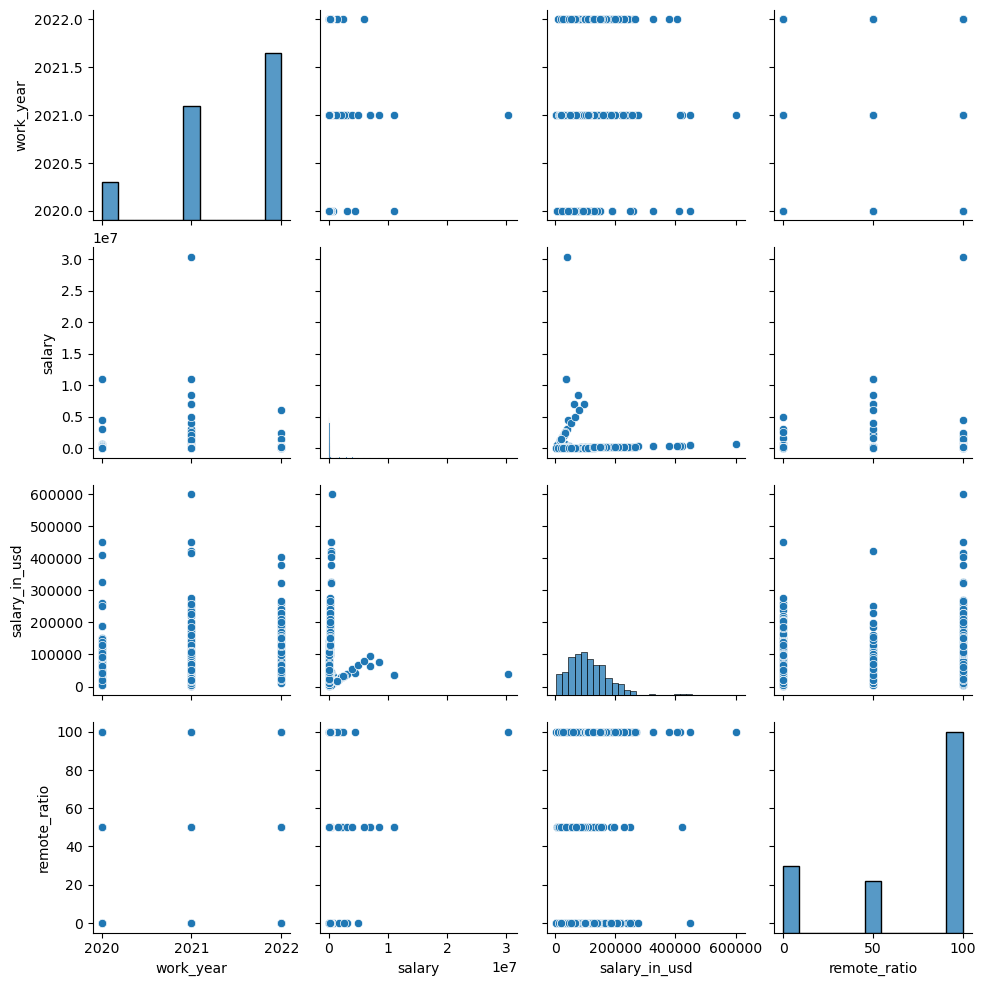

In [29]:
# pairplot to visualize numerical fetures

plt.figure(figsize=(15, 5))
sns.pairplot(data=data);

Focus in pairplot, and you will see all information that i said it before

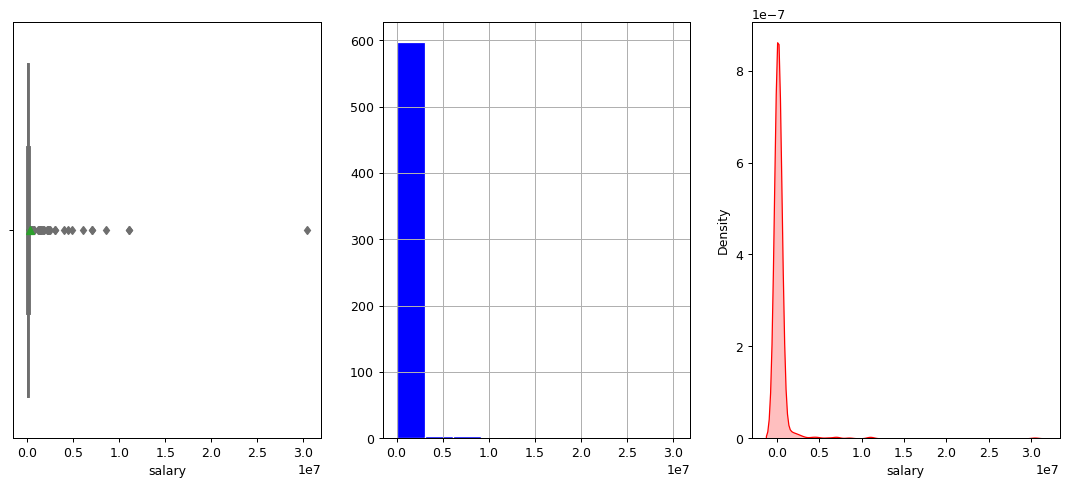

In [30]:
# From previous analysis and from pairplot, we saw there are an outliers in salary, So let's draw it by boxplot, ...

fig, axes = plt.subplots(1,3,figsize=(15,6),dpi = 90)

sns.boxplot(x =data.salary, showmeans=True, orient='h',color="violet",data = data,ax=axes[0])
sns.set_style('darkgrid')

data['salary'].hist(bins = 10,color='blue',ax=axes[1]) 

sns.kdeplot(data.salary, shade=True,ax=axes[2] ,color ='red')
plt.show()

In [31]:
data.salary.quantile([0.9])

0.9    237000.0
Name: salary, dtype: float64

90% of salary data is =< 237000, Not millions

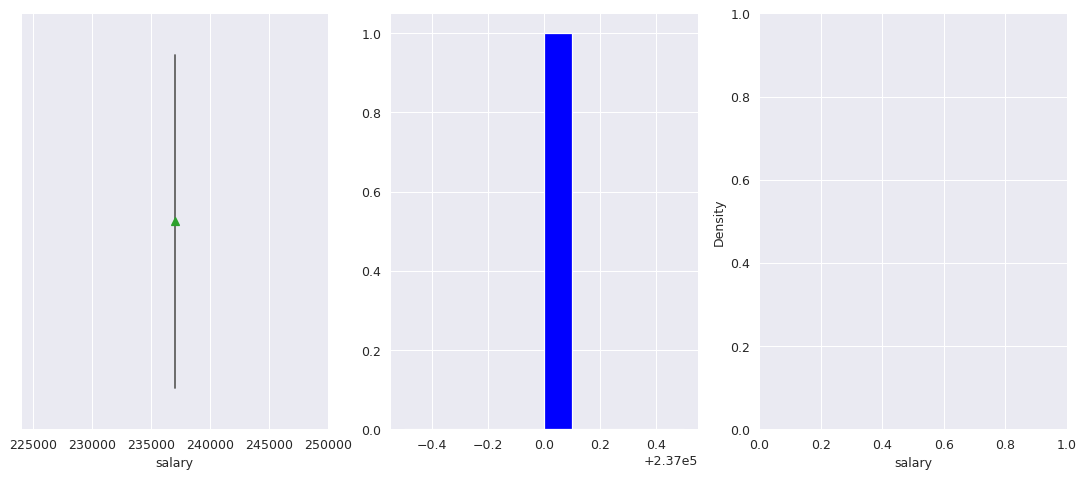

In [32]:
fig, axes = plt.subplots(1,3,figsize=(15,6),dpi = 90)

sns.boxplot(x =data.salary.quantile([0.9]), showmeans=True, orient='h',color="violet",data = data,ax=axes[0])
sns.set_style('darkgrid')

data['salary'].quantile([0.9]).hist(bins = 10,color='blue',ax=axes[1]) 

sns.kdeplot(data.salary.quantile([0.9]), shade=True,ax=axes[2] ,color ='red')
plt.show()

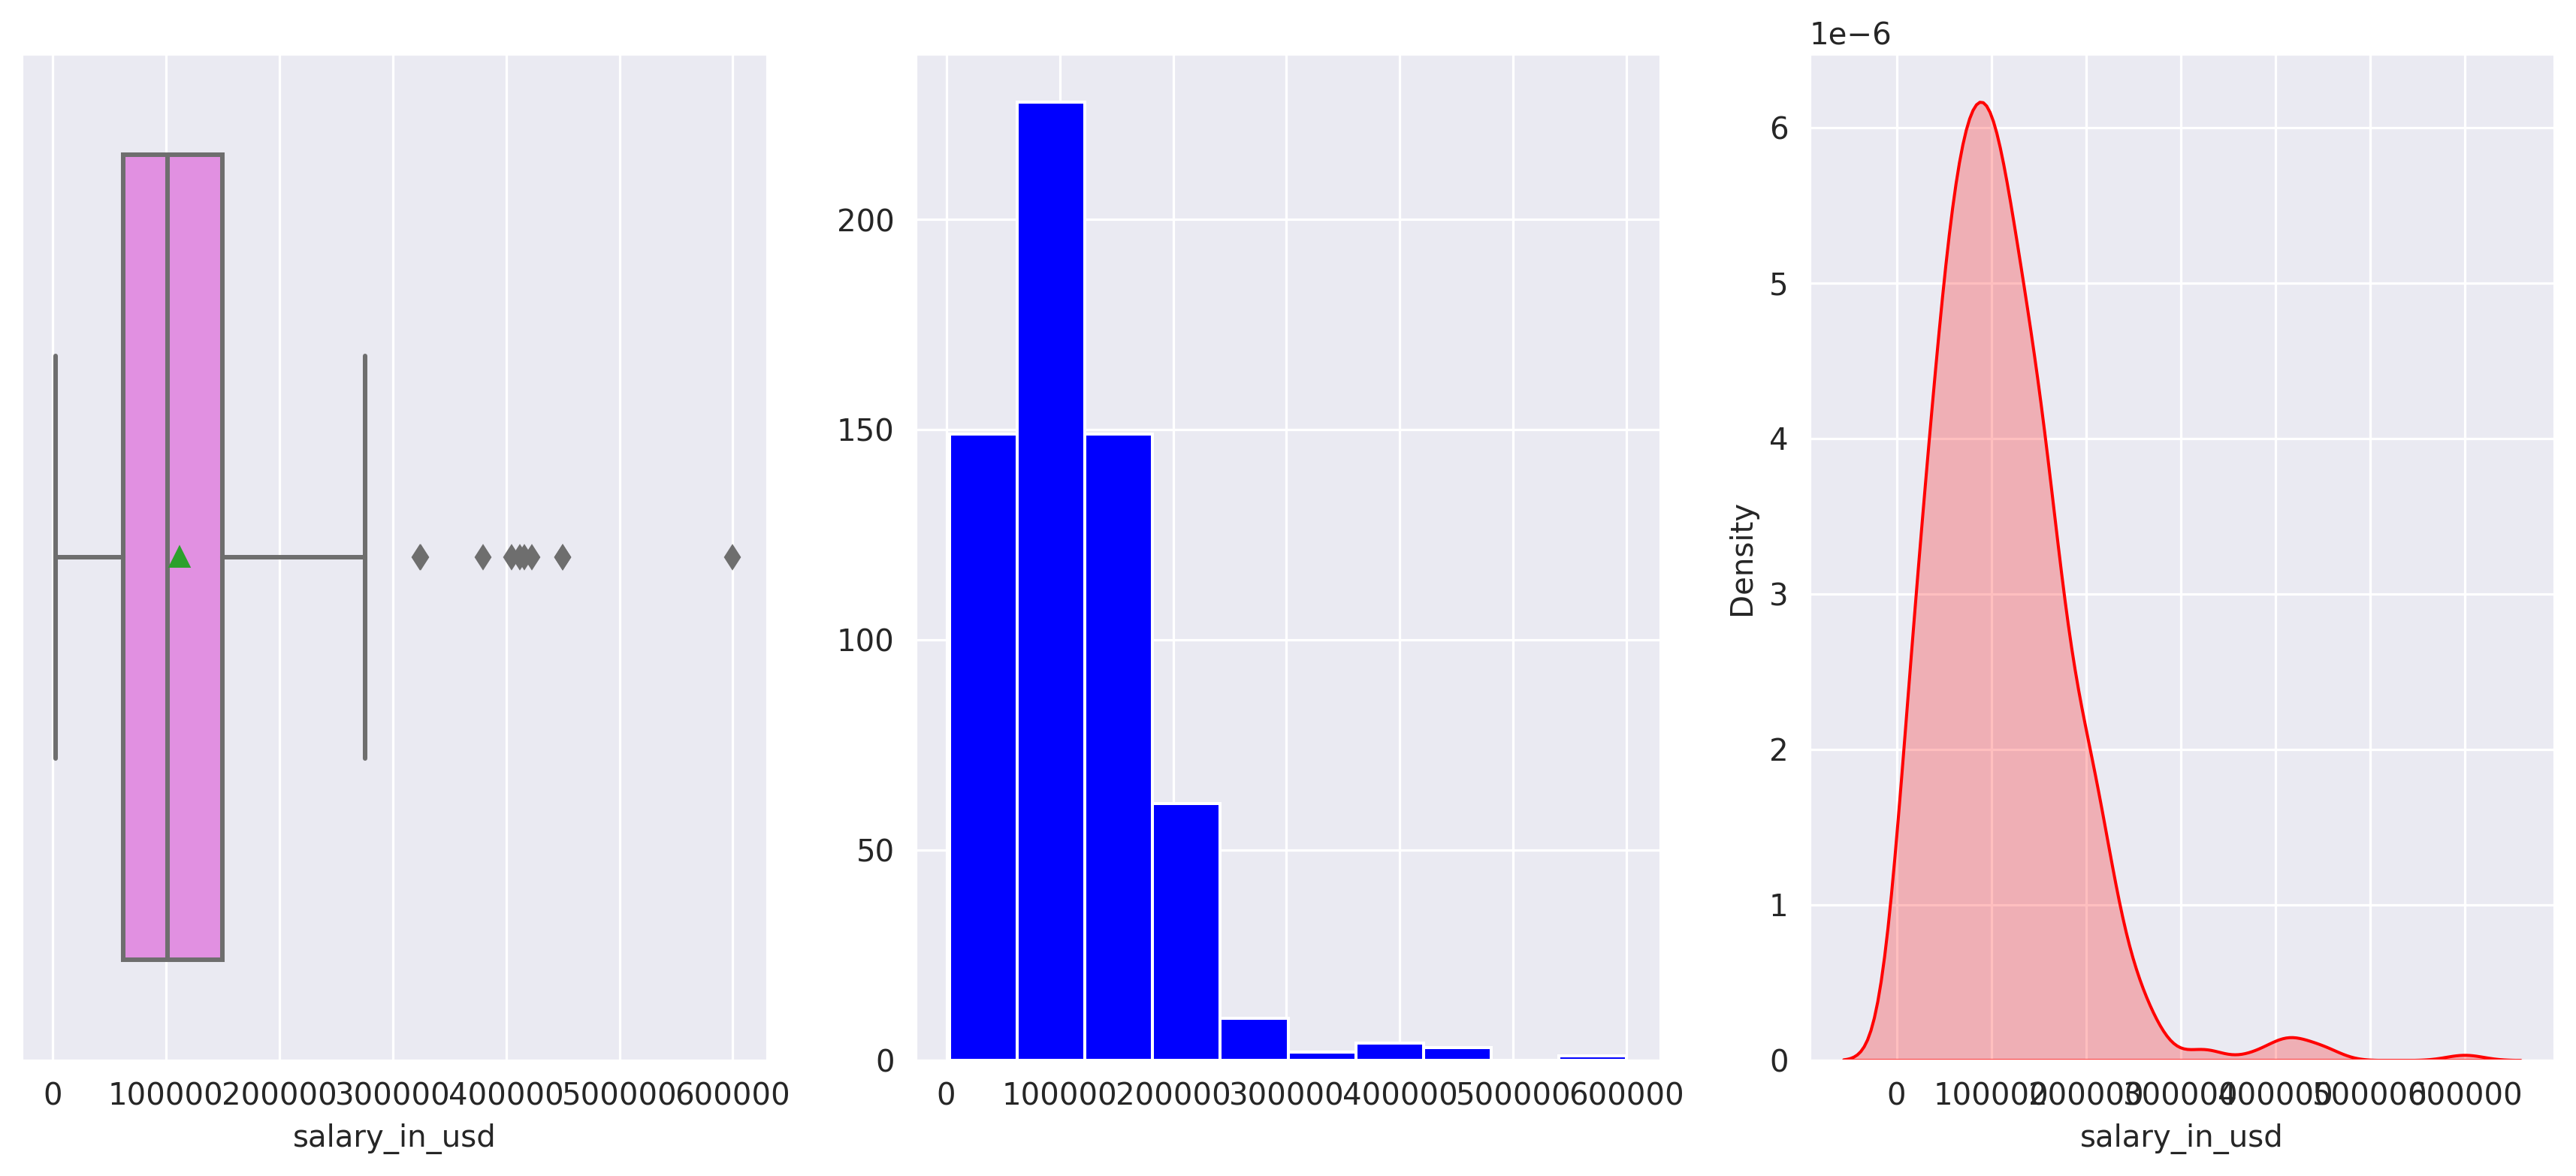

In [33]:
# Salary in usd

fig, axes = plt.subplots(1,3,figsize=(15, 6),dpi = 290)

sns.boxplot(x =data.salary_in_usd, showmeans=True, orient='h',color="violet",data = data,ax=axes[0])

sns.set_style('darkgrid')

data['salary_in_usd'].hist(bins = 10, color='blue', ax=axes[1])

sns.kdeplot(data.salary_in_usd, shade=True,ax=axes[2] ,color ='red')
plt.show()

Look to histogram --> Right Skewed Not Gaussian distribution

In [34]:
data.salary_in_usd.quantile([0.9])

0.9    200000.0
Name: salary_in_usd, dtype: float64

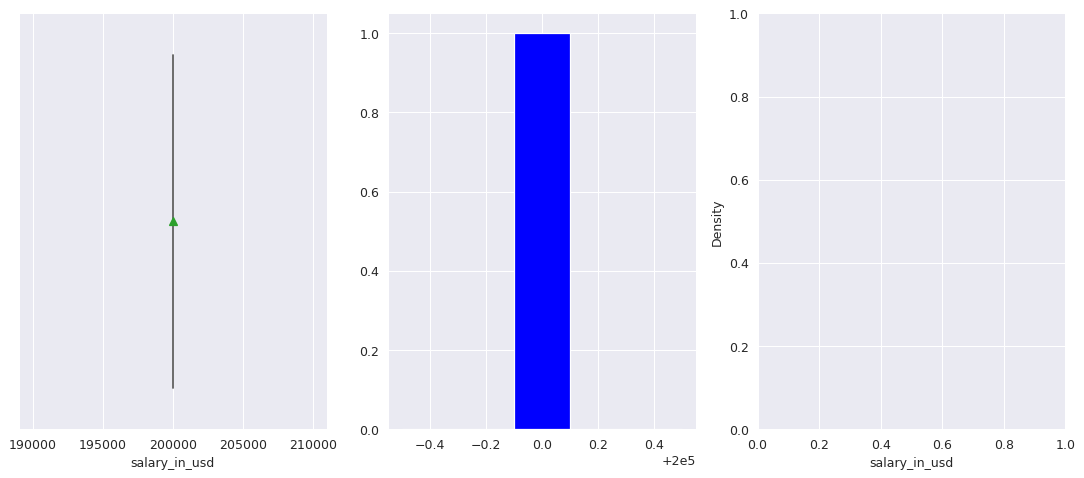

In [35]:
# Salary in usd, 90% of data

fig, axes = plt.subplots(1,3,figsize=(15, 6),dpi = 90)

sns.boxplot(x =data.salary_in_usd.quantile([0.9]), showmeans=True, orient='h',color="violet",data = data,ax=axes[0])

sns.set_style('darkgrid')

data['salary_in_usd'].quantile([0.9]).hist(bins = 5, color='blue', ax=axes[1])

sns.kdeplot(data.salary_in_usd.quantile([0.9]), shade=True,ax=axes[2] ,color ='red')
plt.show()

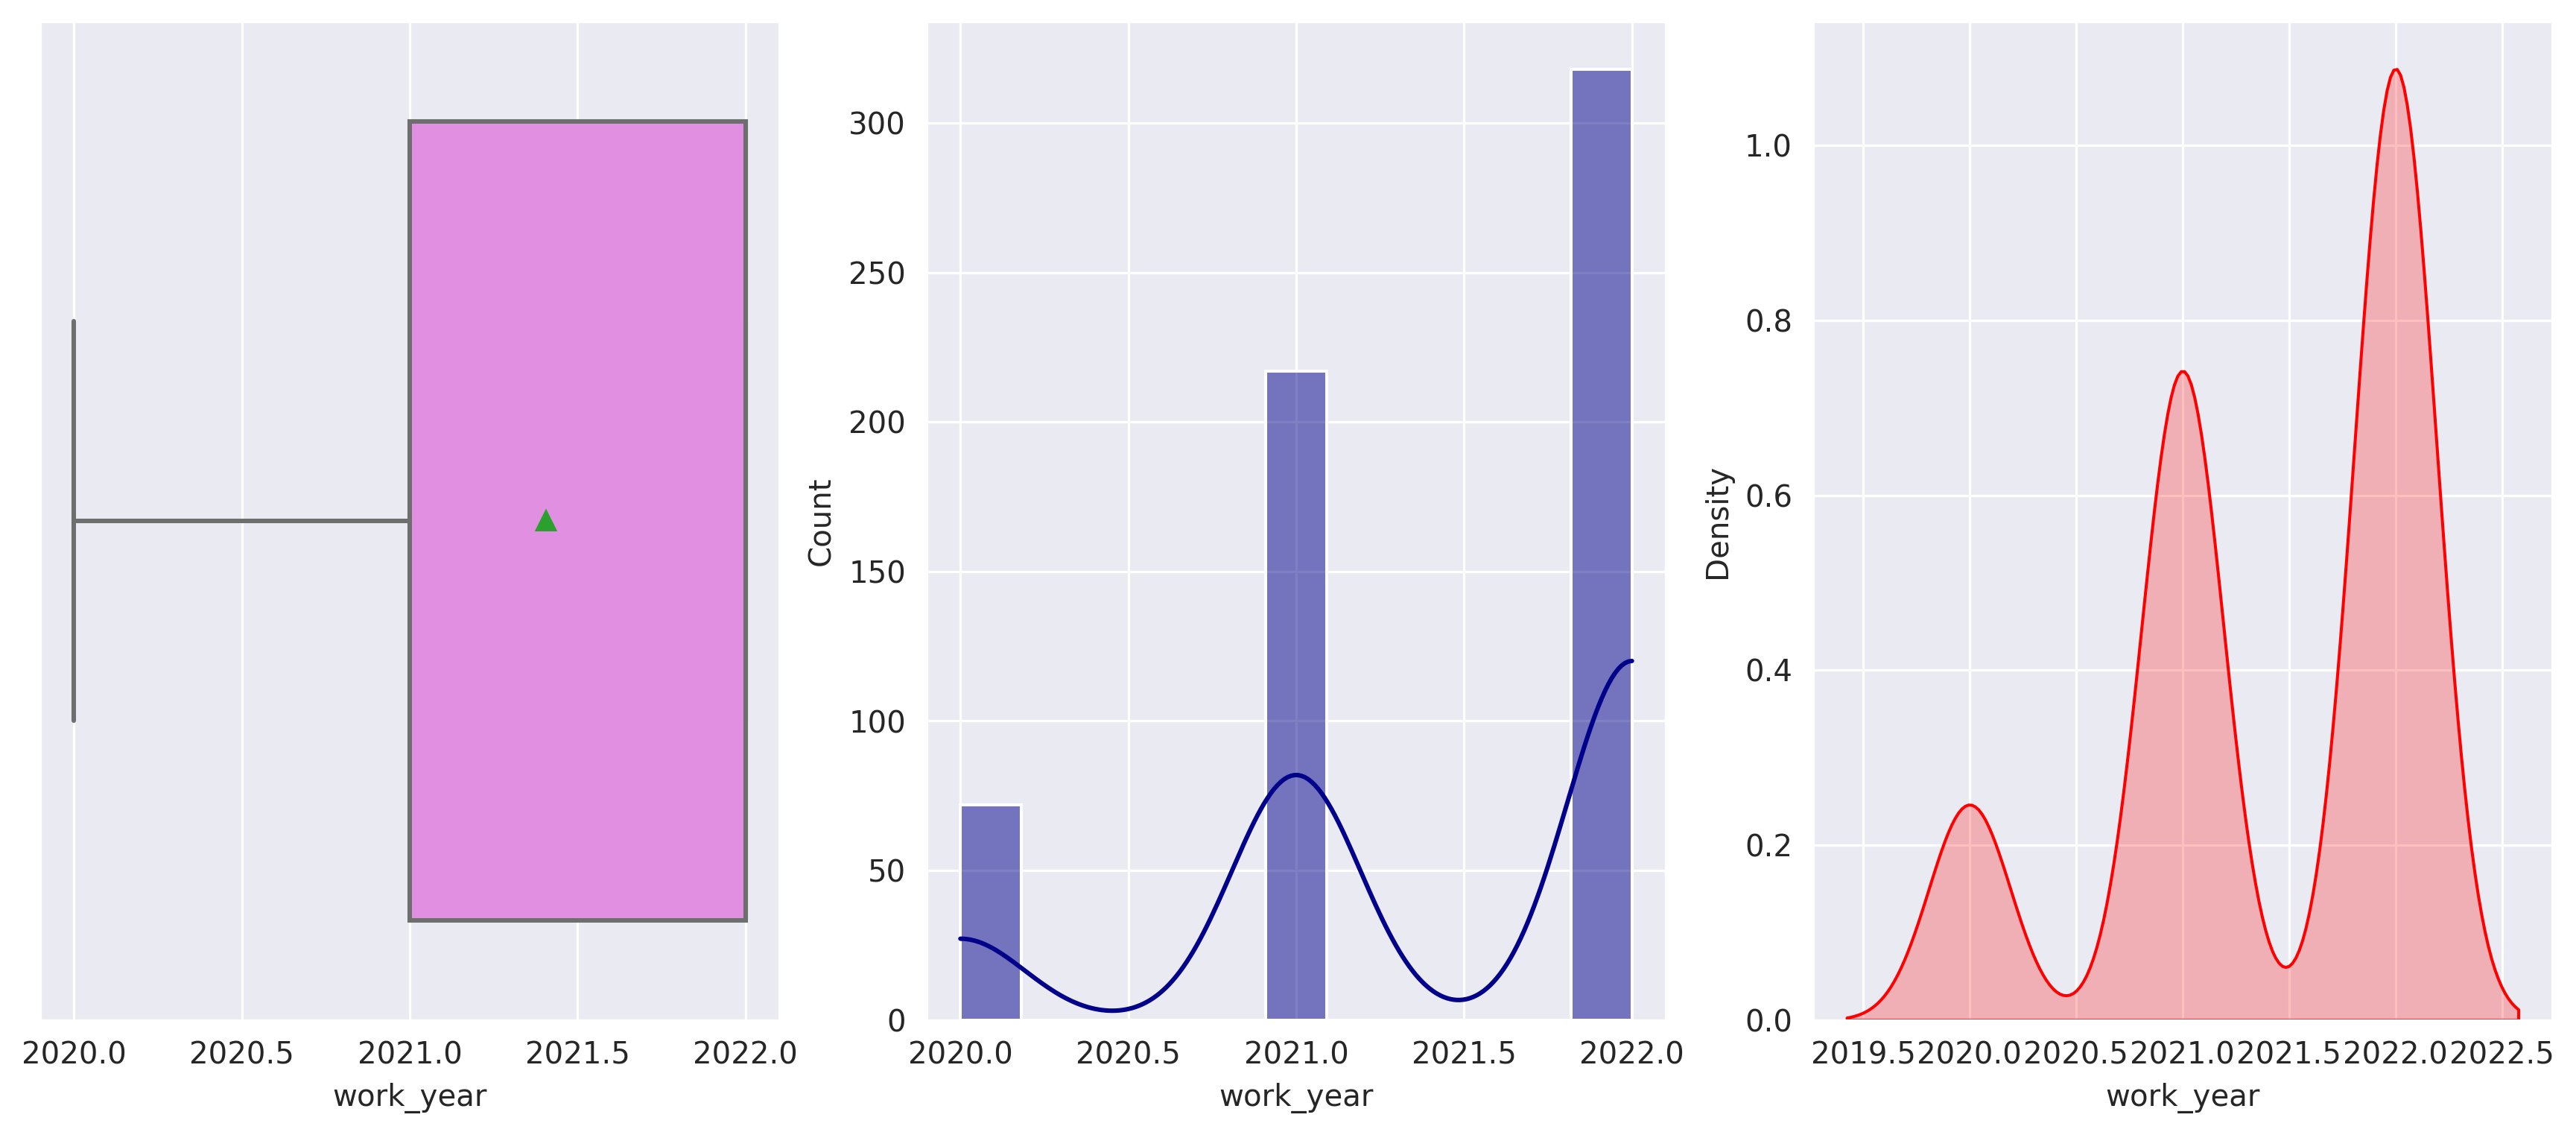

In [36]:
# Work year

fig, axes = plt.subplots(1,3,figsize=(15, 6),dpi = 290)

sns.boxplot(x =data.work_year, showmeans=True, orient='h',color="violet",data = data,ax=axes[0])
sns.set_style('darkgrid')

sns.histplot(data.work_year, kde=True,color='darkblue',ax=axes[1])

sns.kdeplot(data.work_year, shade=True,ax=axes[2] ,color ='red')
plt.show()

The majority is with 2022

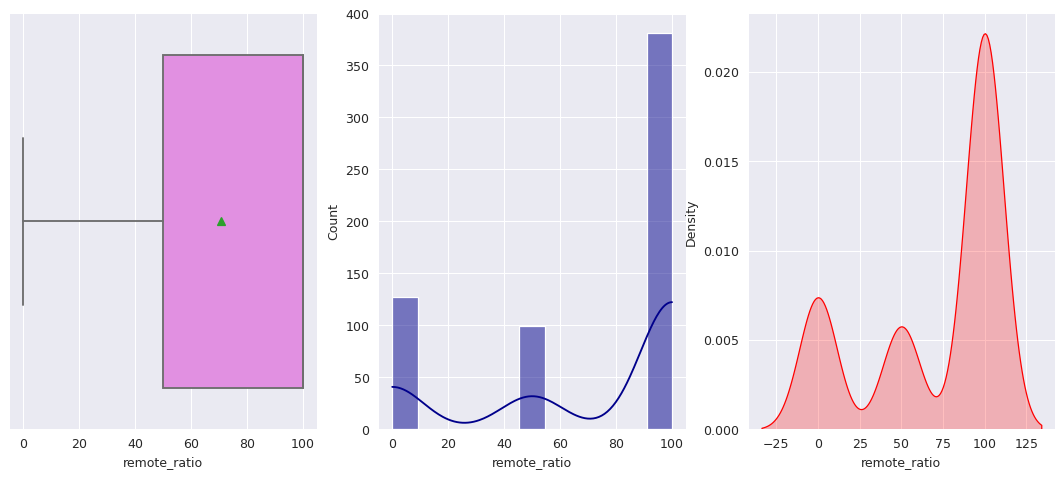

In [37]:
# Remote ratio

fig, axes = plt.subplots(1,3,figsize=(15, 6),dpi = 90)

sns.boxplot(x =data.remote_ratio, showmeans=True, orient='h',color="violet",data = data,ax=axes[0])
sns.set_style('darkgrid')

sns.histplot(data.remote_ratio, kde=True,color='darkblue',ax=axes[1])

sns.kdeplot(data.remote_ratio, shade=True,ax=axes[2] ,color ='red')
plt.show()

As previous, the majority is with 100(Fully remote)

In [38]:
data.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


<AxesSubplot:xlabel='salary', ylabel='salary_in_usd'>

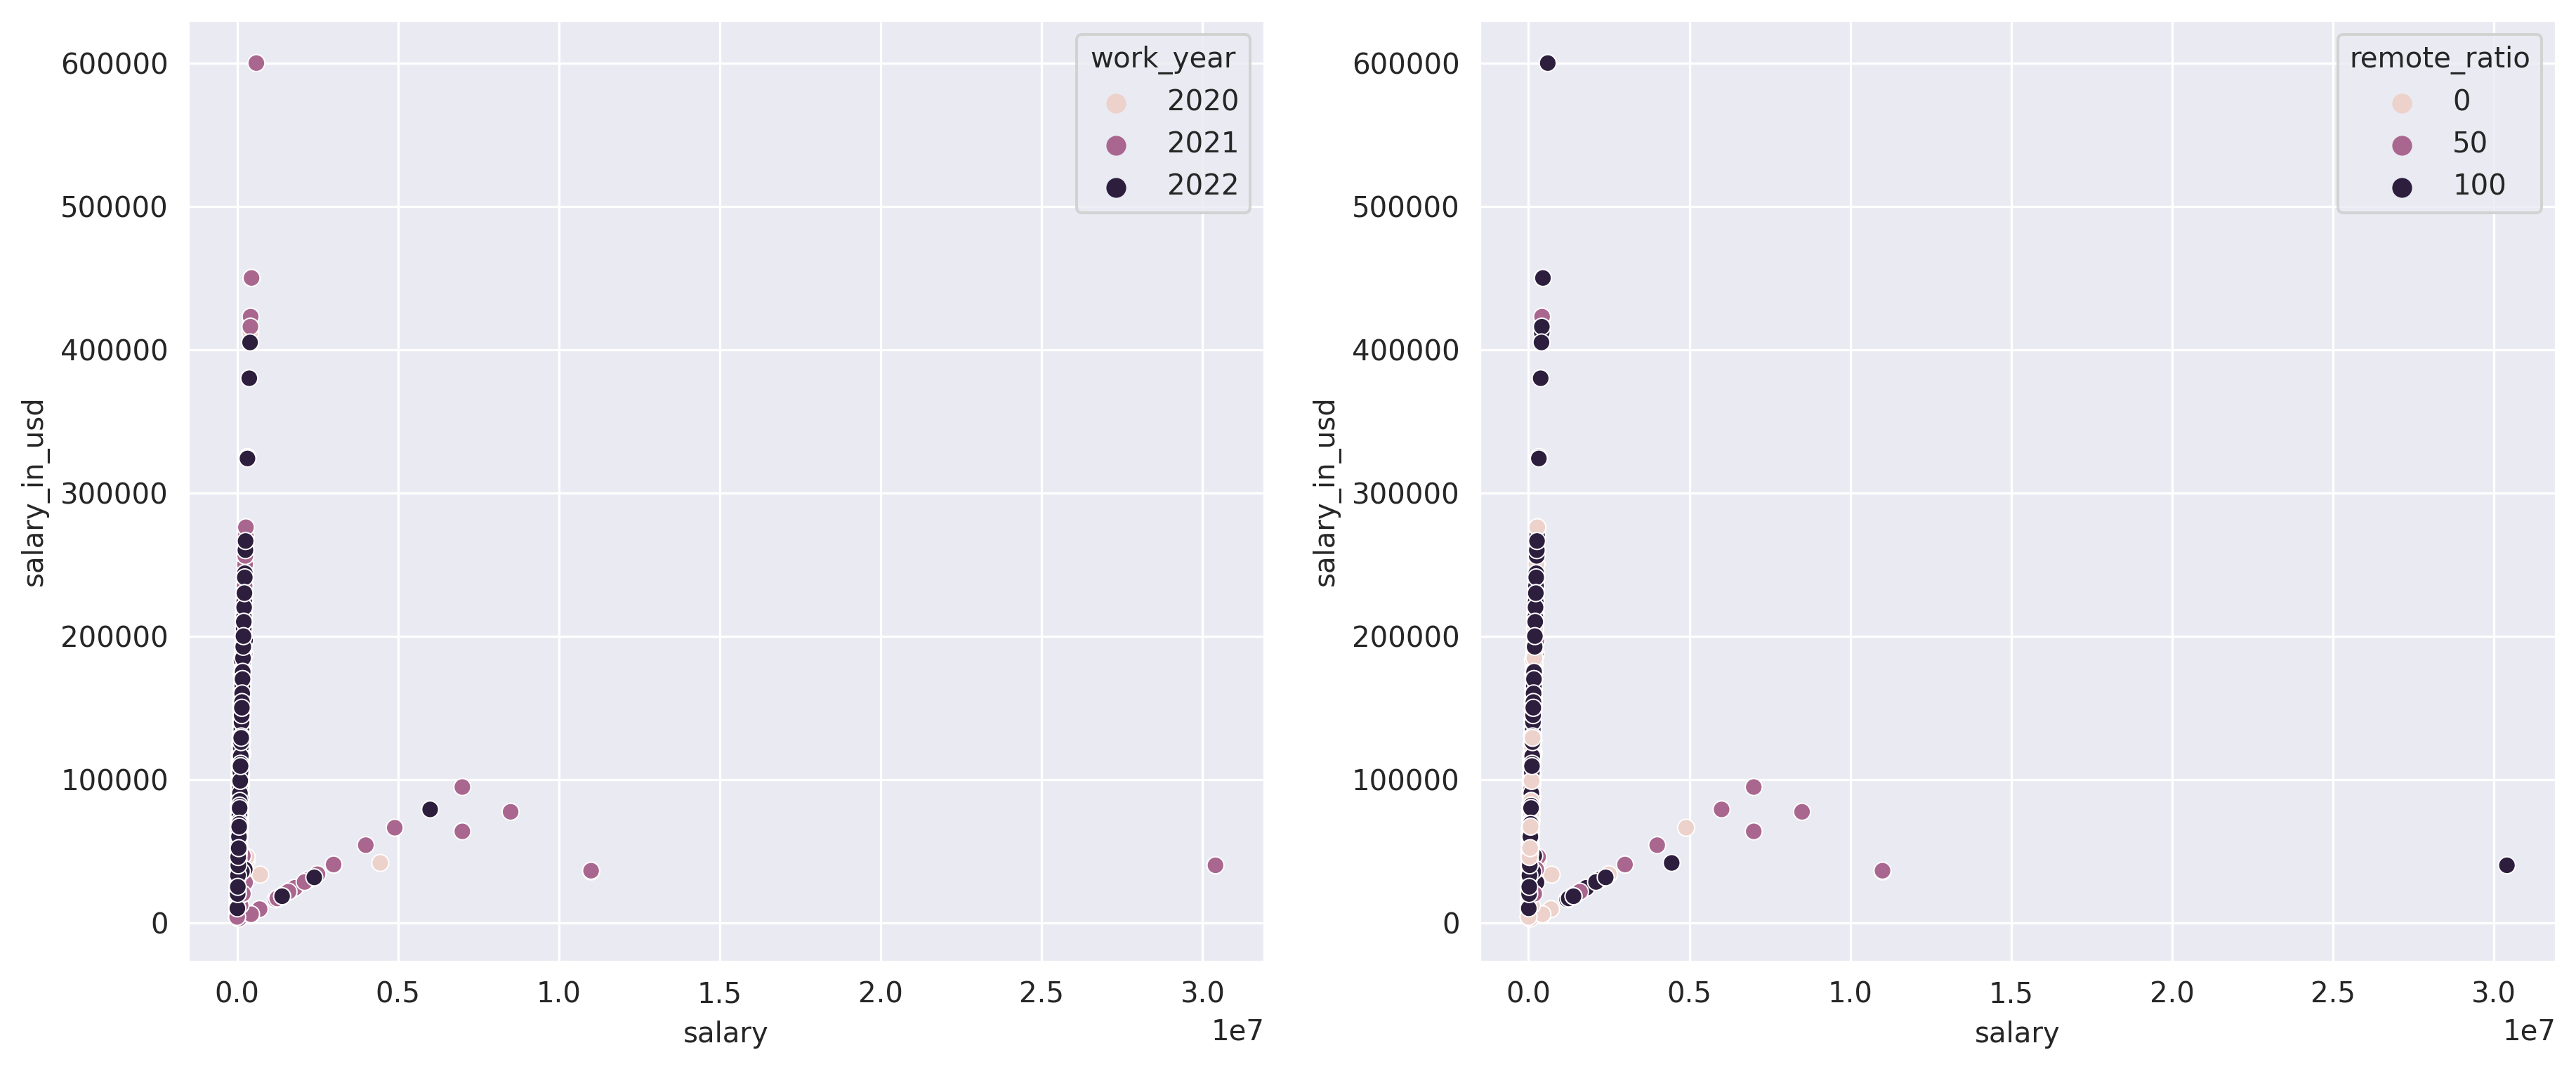

In [39]:
fig, axes = plt.subplots(1,2,figsize=(15, 6), dpi = 290)

sns.scatterplot(data = data, x=data.salary, y=data.salary_in_usd, hue="work_year", ax=axes[0])

sns.scatterplot(data = data, x=data.salary, y=data.salary_in_usd, hue="remote_ratio", ax=axes[1])

Look the majority is with 2022 & 100(Fully remote), and in fact i see all different tools lead to same results

<AxesSubplot:xlabel='salary_in_usd', ylabel='employment_type'>

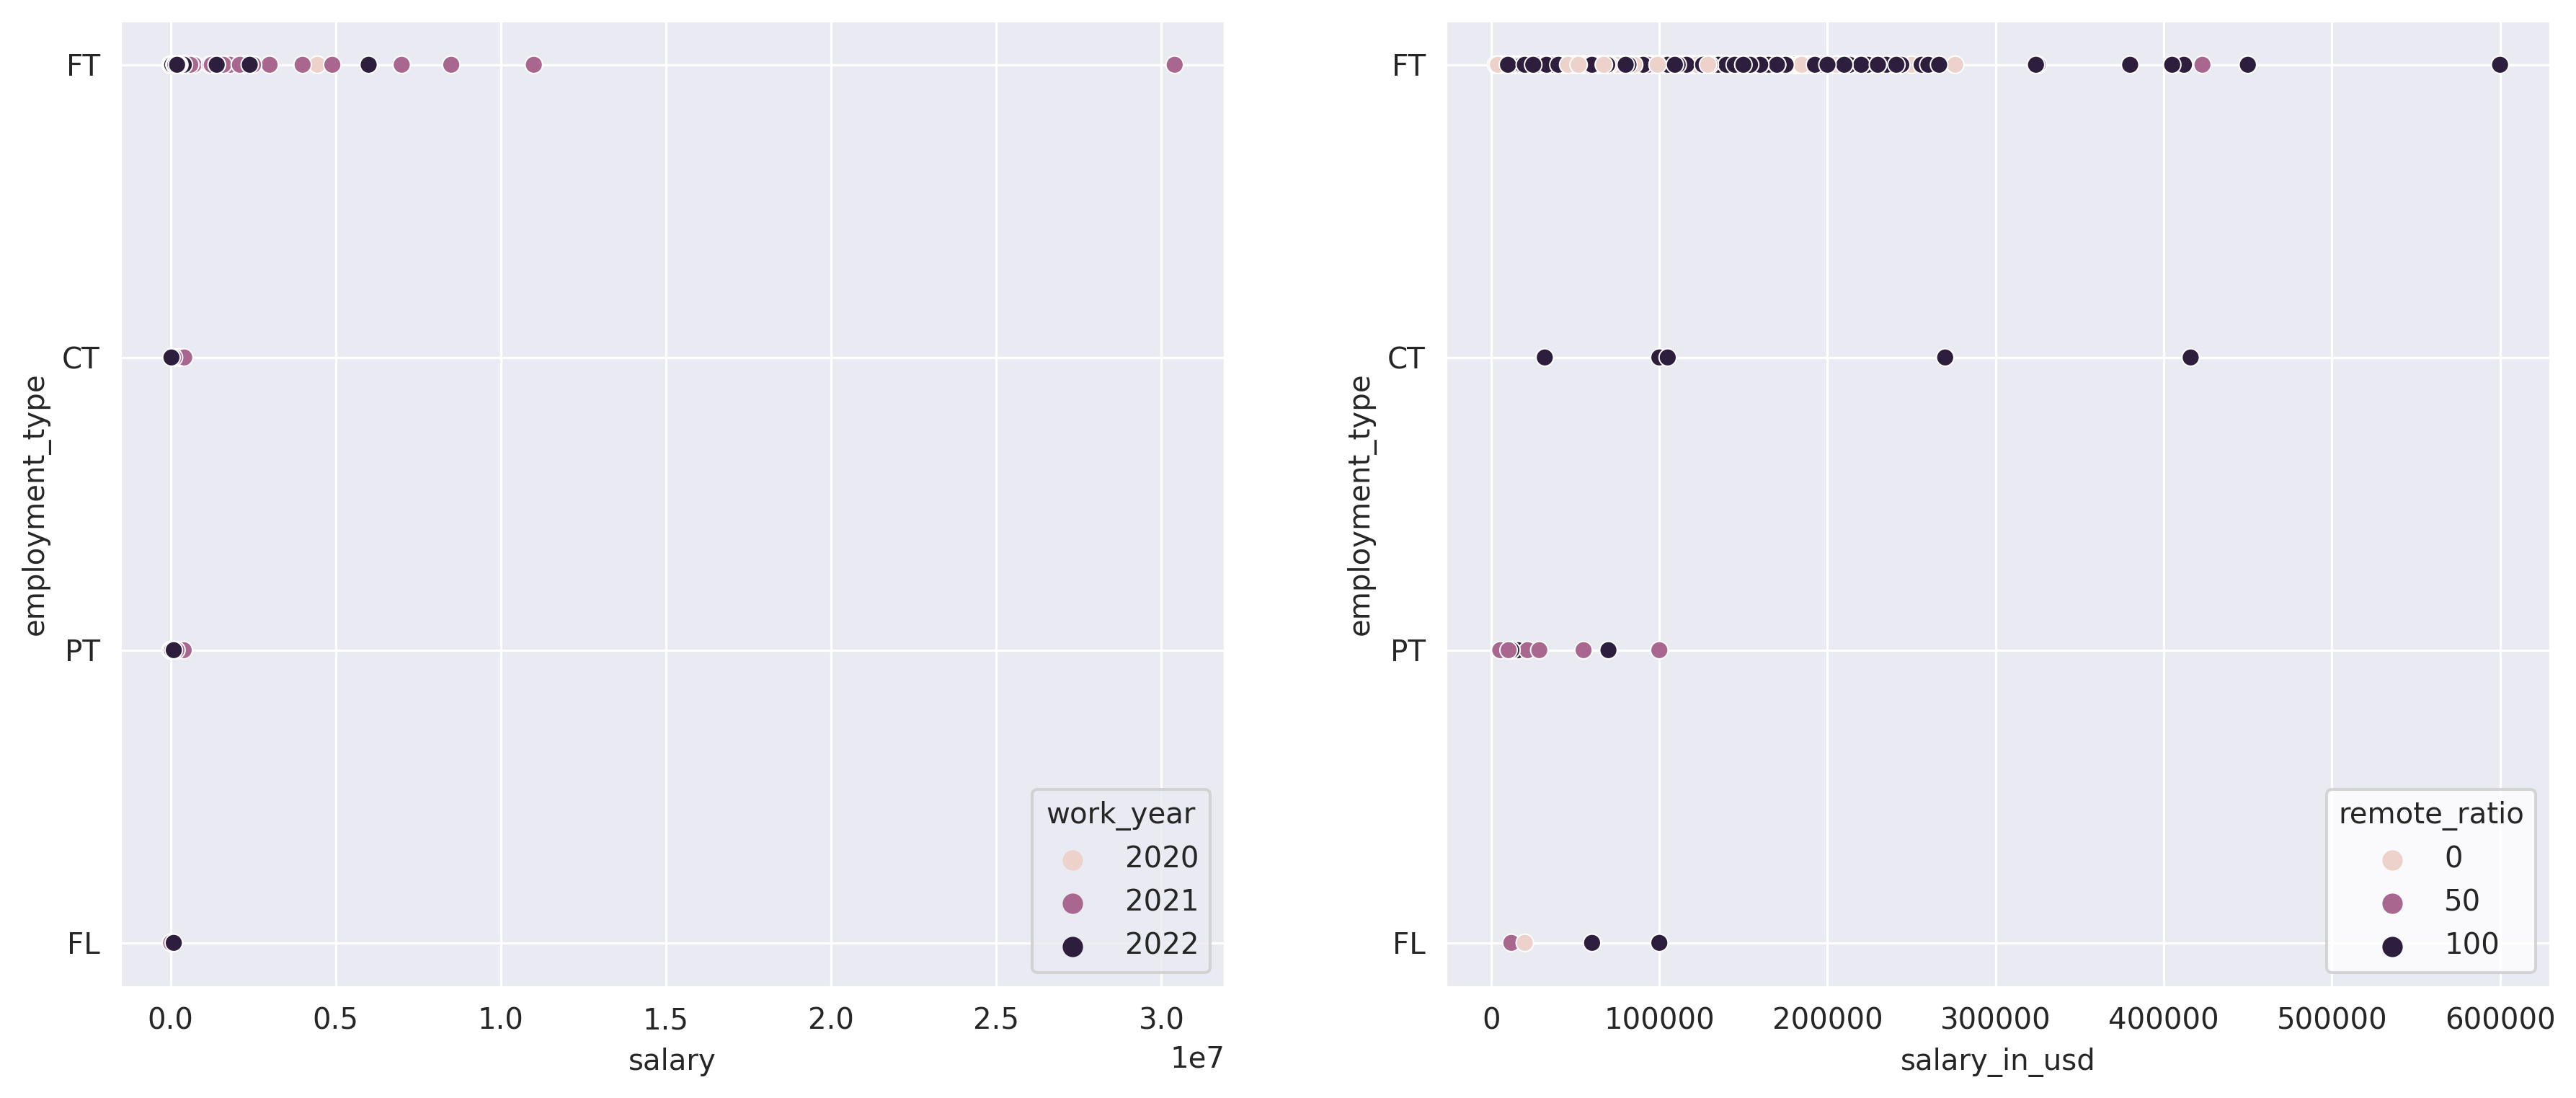

In [40]:
fig, axes = plt.subplots(1,2,figsize=(15, 6), dpi = 290)

sns.scatterplot(data = data, x=data.salary, y=data.employment_type, hue="work_year", ax=axes[0])
sns.set_style("whitegrid")

sns.scatterplot(data = data, x=data.salary_in_usd, y=data.employment_type, hue="remote_ratio", ax=axes[1])

The chart show the most employment type is FT(Full Time), & the less is Fl(FreeLance)

# 5- EDA(Part 2)

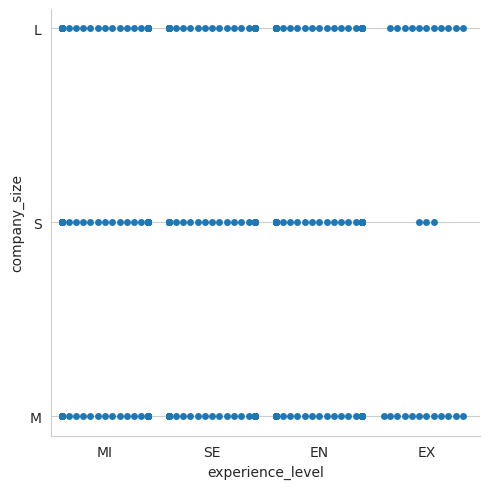

In [41]:
 sns.catplot(data=data, x="experience_level", y="company_size", kind="swarm");

Look! the experts level(EX) is little in small companies

<function matplotlib.pyplot.show(close=None, block=None)>

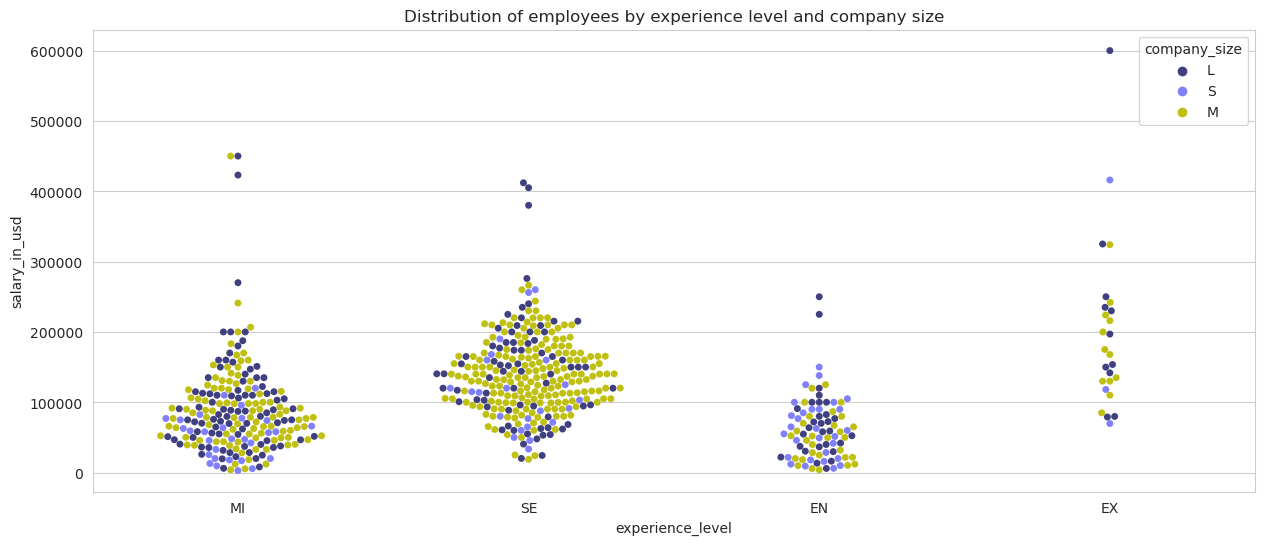

In [42]:
plt.figure(figsize=(15, 6))

sns.swarmplot(data =data, x ='experience_level', y ='salary_in_usd', hue ='company_size', palette ="gist_stern")

plt.title("Distribution of employees by experience level and company size")
plt.show

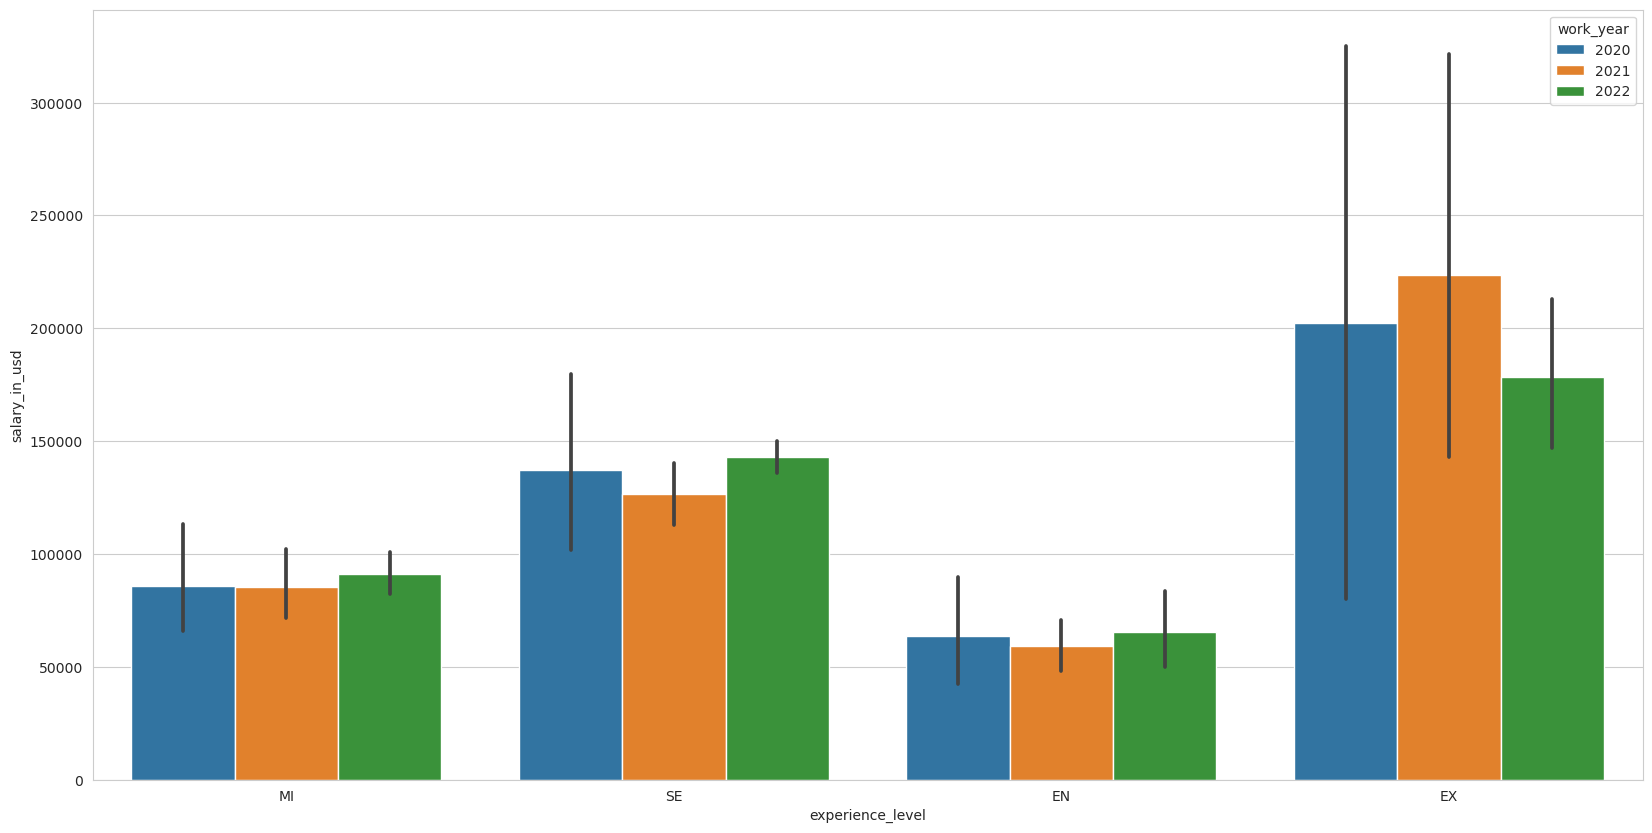

In [43]:
plt.figure(figsize=(20, 10))

sns.barplot(data=data, x="experience_level", y="salary_in_usd", hue="work_year")
sns.set_style('darkgrid');

The more experience level, the more salary in usd

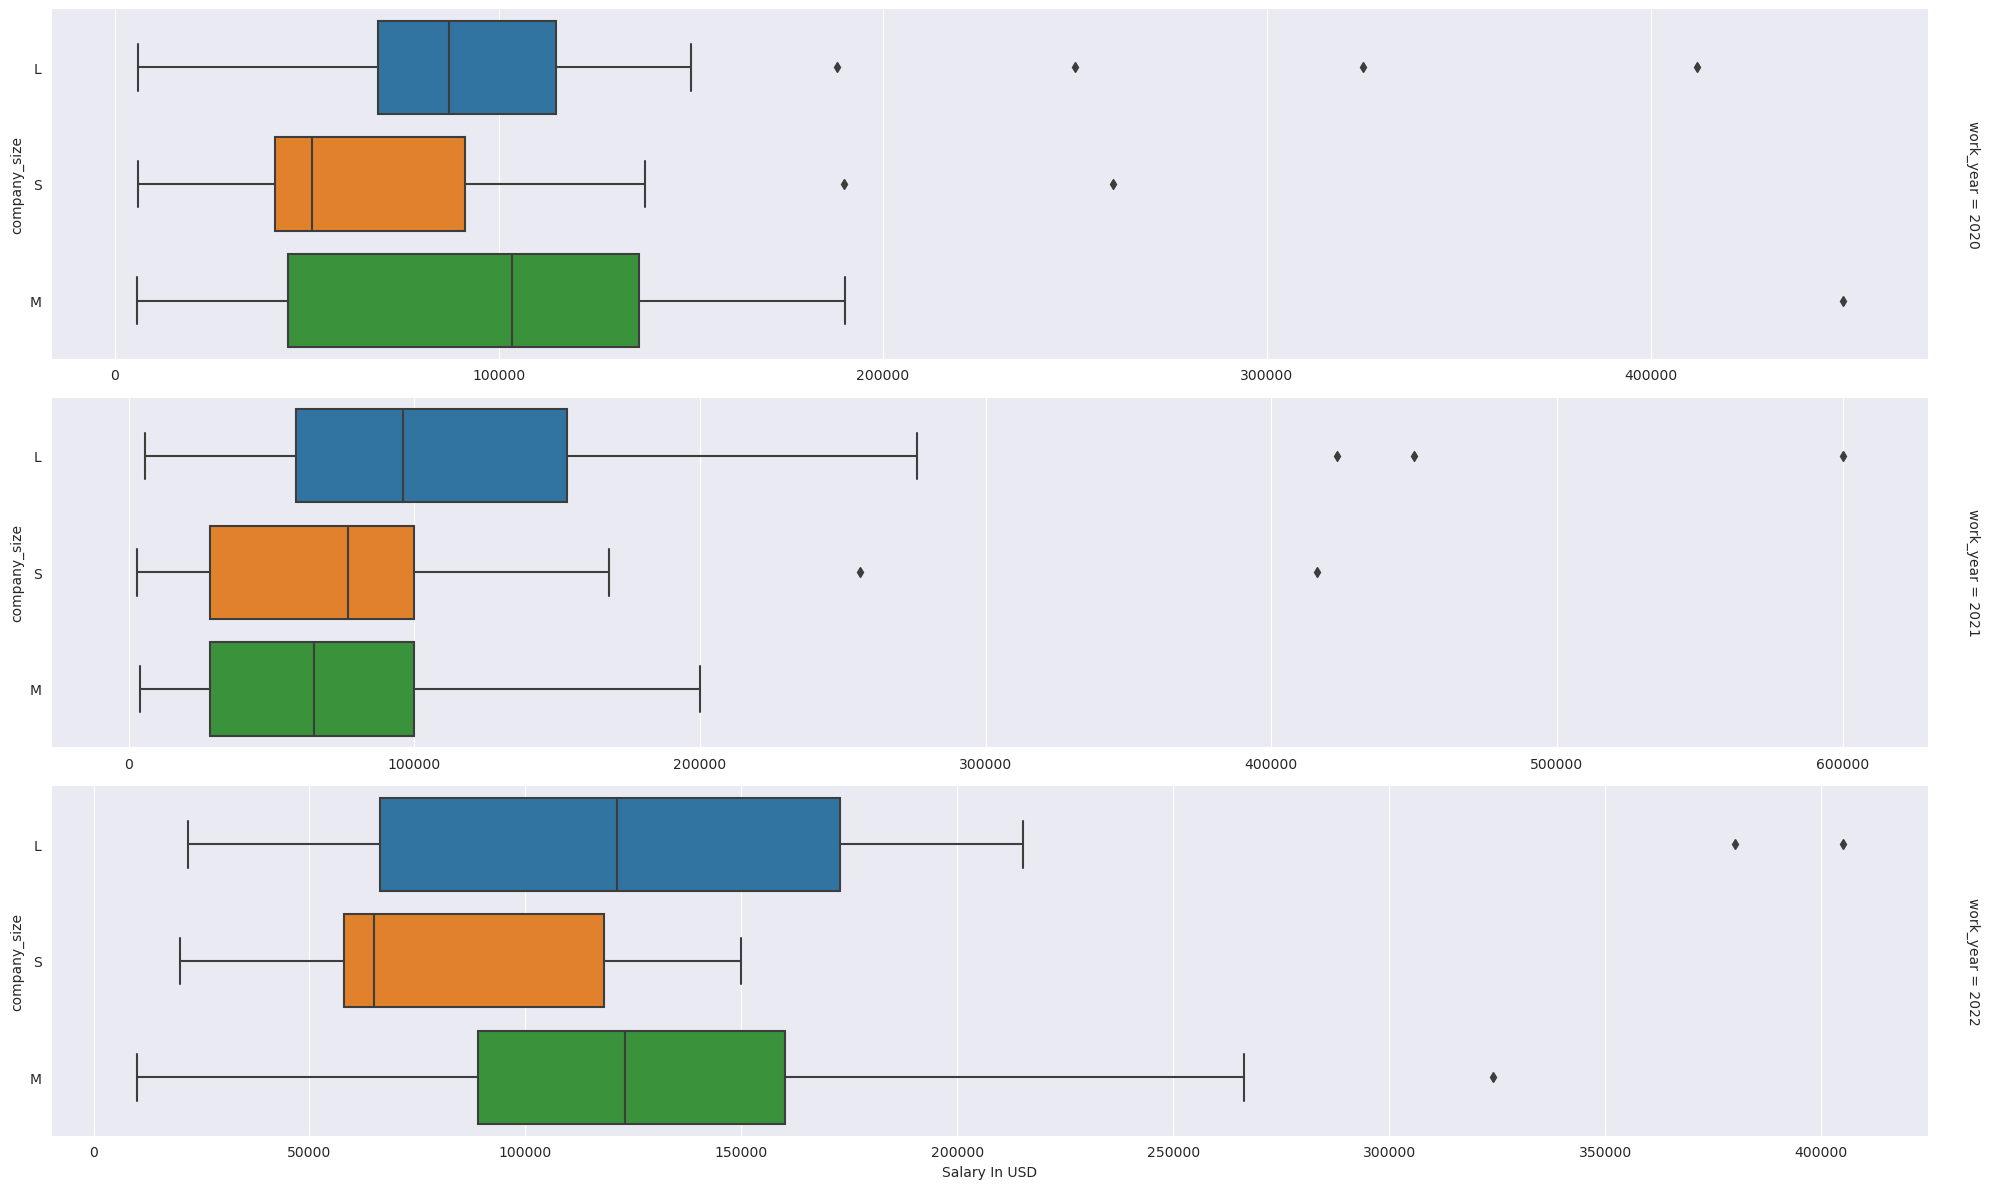

In [44]:
 sns.catplot(
    data=data,
    x="salary_in_usd", y="company_size", row="work_year",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=4, aspect=5,
)
plt.xlabel("Salary In USD");

In 2022, the more salary is with large company, and also the outliers are more with large company, & that's logical because the large company always invest in professional employee

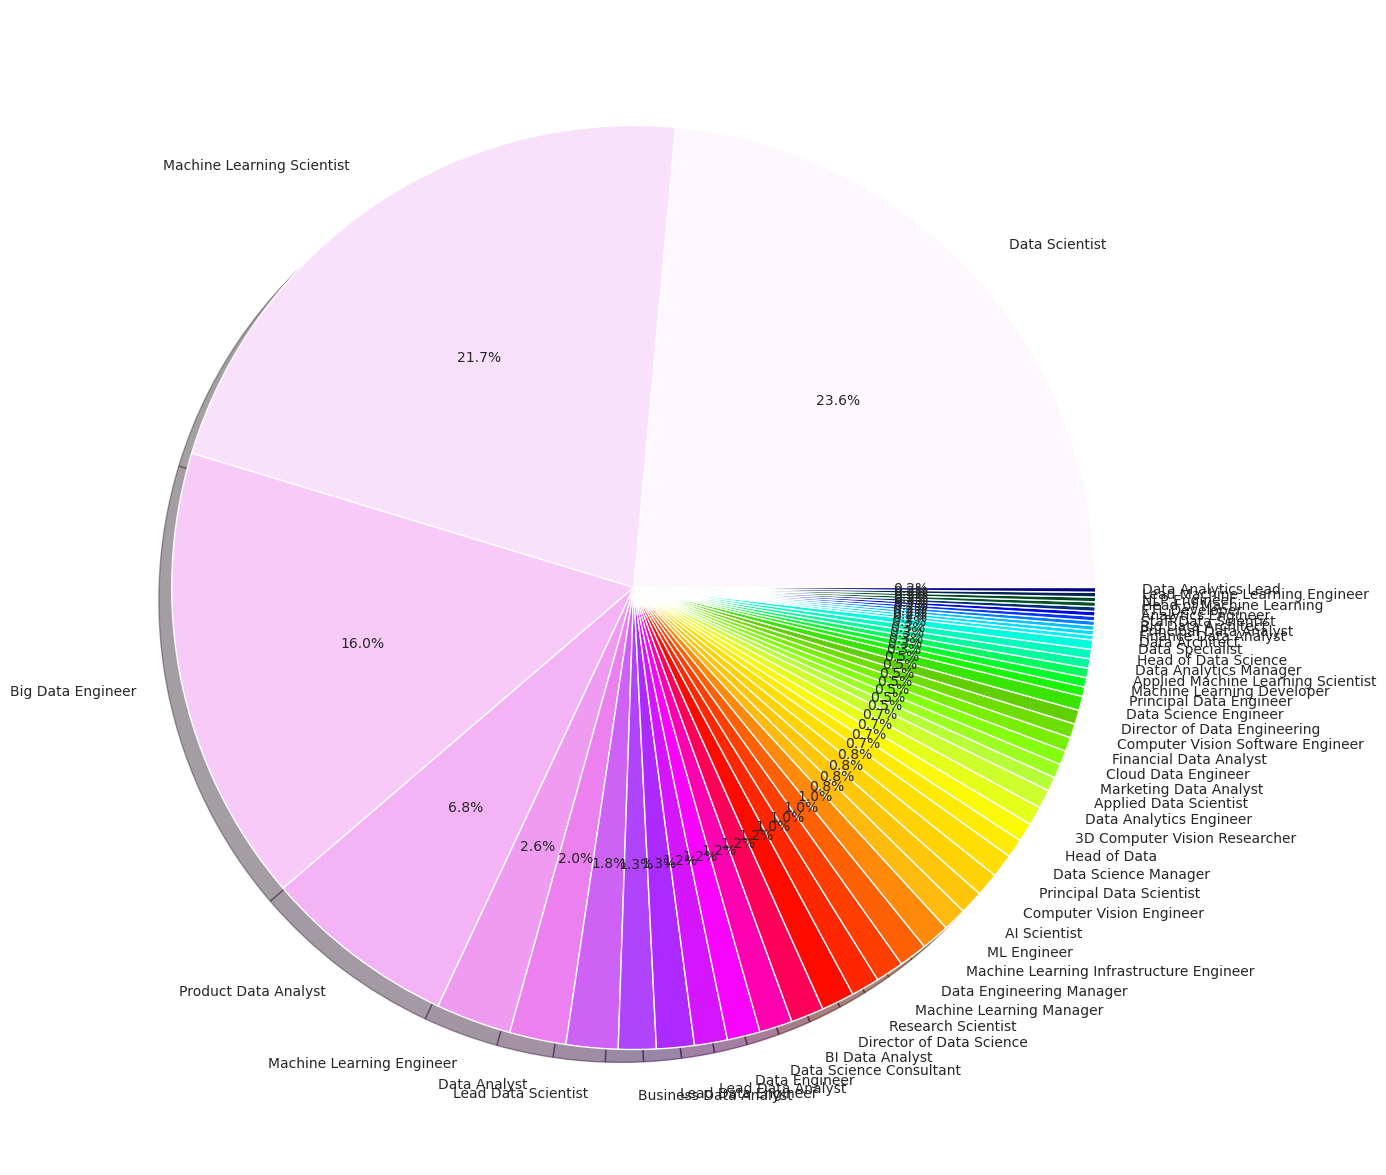

In [45]:
plt.figure(figsize=(30, 15))
cmap = plt.get_cmap('gist_ncar_r')
plt.pie(x=data.job_title.value_counts(), 
        labels=data.job_title.unique(), 
        autopct='%.1f%%', shadow=True, 
        colors= cmap(np.linspace(0, 1, len(data.job_title.unique()))));

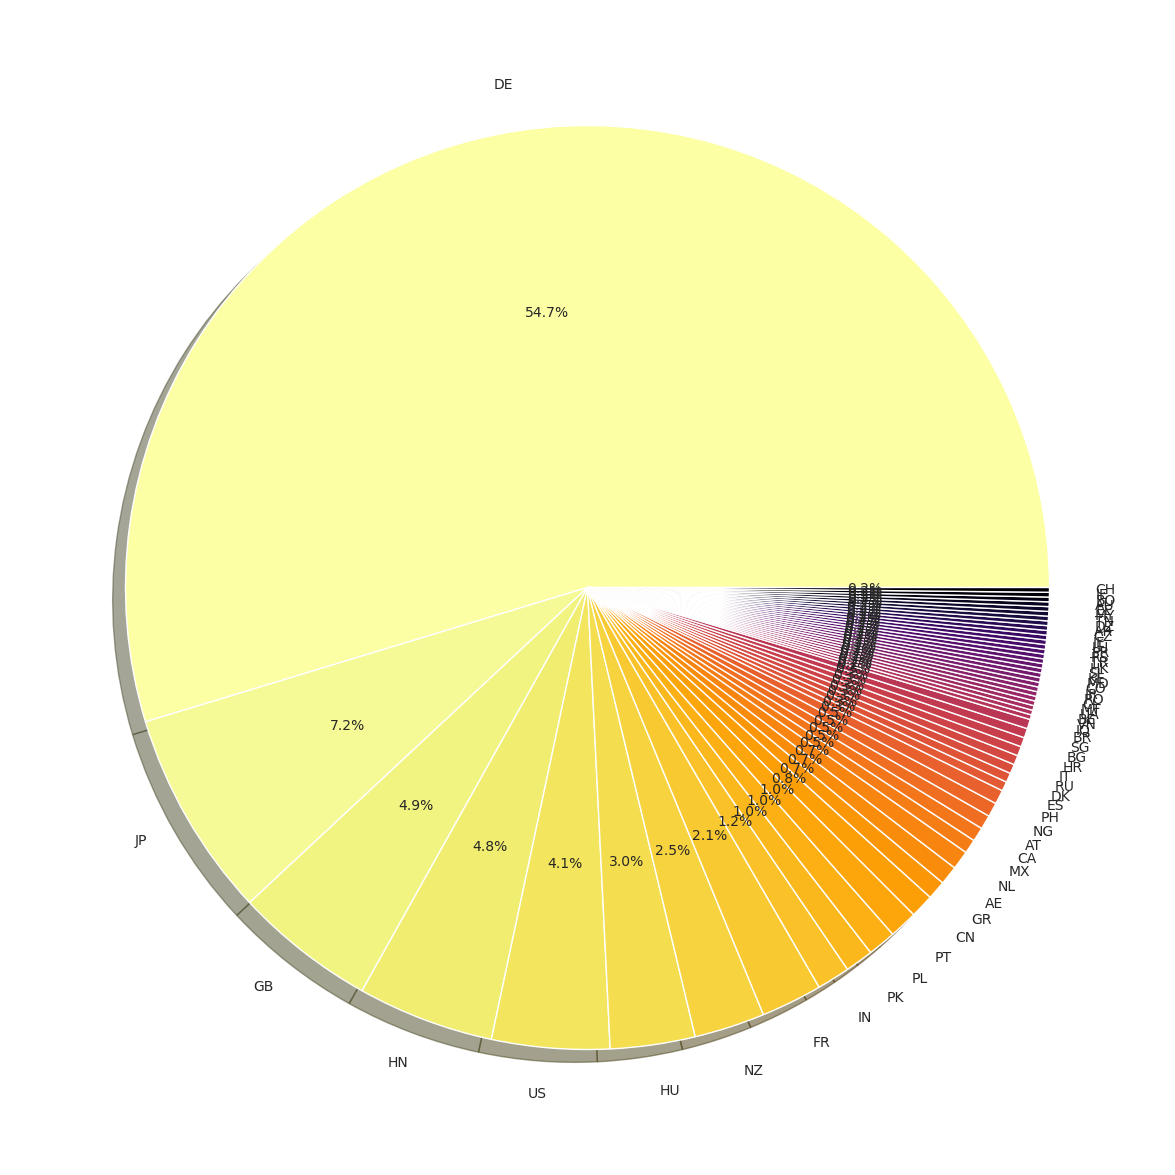

In [46]:
plt.figure(figsize=(30, 15))
cmap = plt.get_cmap('inferno_r')
plt.pie(x=data.employee_residence.value_counts(), 
        labels=data.employee_residence.unique(), 
        autopct='%.1f%%', shadow=True, 
        colors= cmap(np.linspace(0, 1, len(data.employee_residence.unique()))));

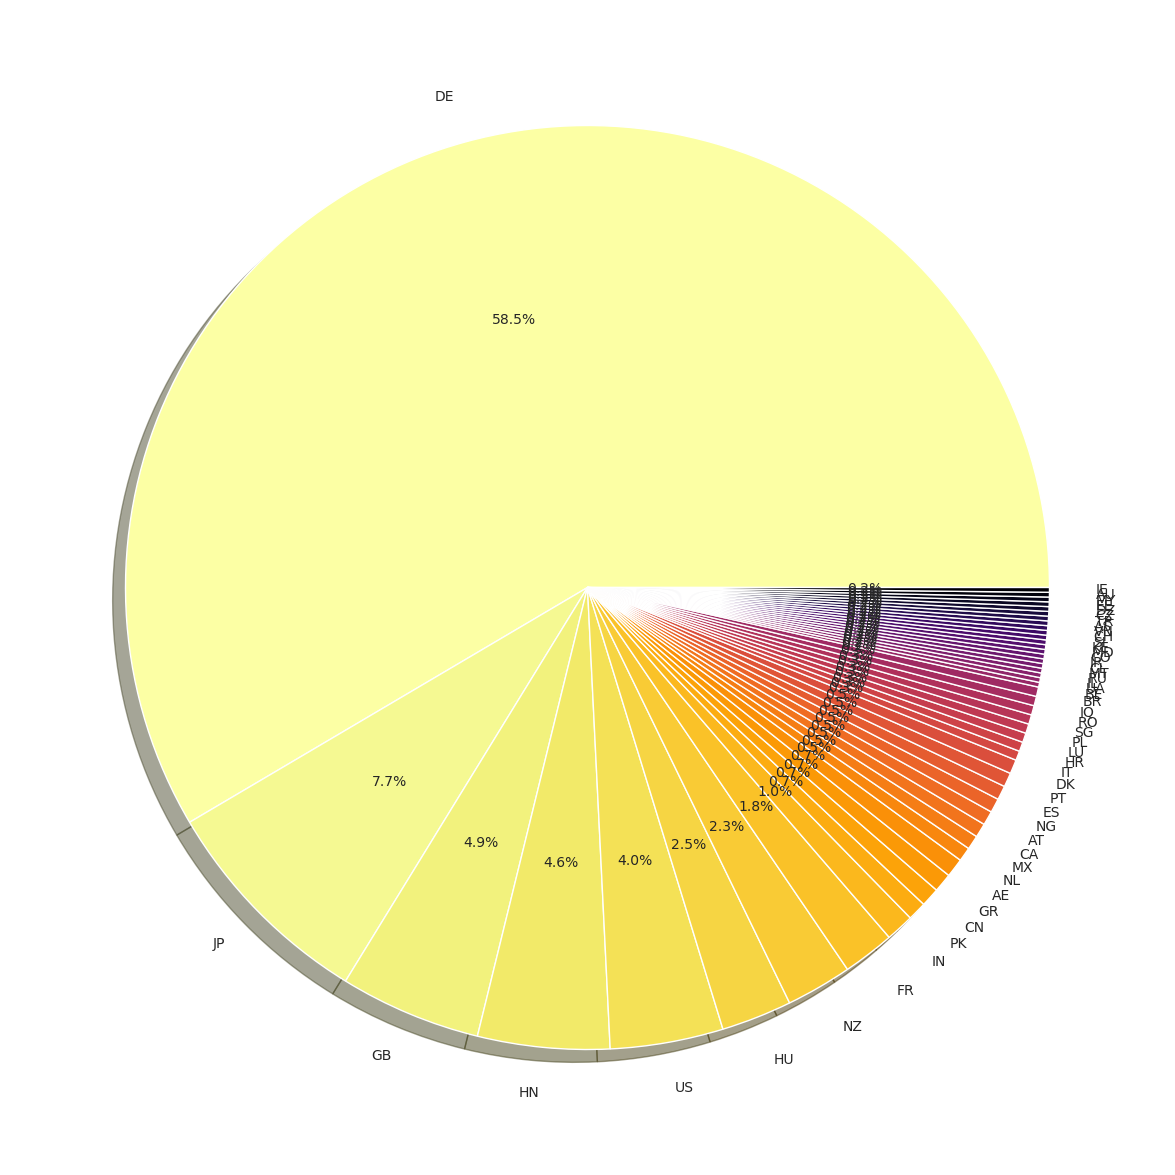

In [47]:
plt.figure(figsize=(30, 15))
cmap = plt.get_cmap('inferno_r')
plt.pie(x=data.company_location.value_counts(), 
        labels=data.company_location.unique(), 
        autopct='%.1f%%', shadow=True, 
        colors= cmap(np.linspace(0, 1, len(data.company_location.unique()))));

Note the similarity between company location & employee residance, & that's logical because most employees prefer to work close to where they live